#### Reference to the dataset : https://www.tensorflow.org/api_docs/python/tf/keras/datasets/fashion_mnist/load_data

### Importing the dataset - Fashion Mnist
#### The dataset contains clothes pictures 28x28 ( already splitted in train and test )

In [1]:
import tensorflow
from tensorflow import keras

dataset = keras.datasets.fashion_mnist
((train_images,train_id) , (test_images,test_id)) = dataset.load_data()

#### Size of Dataset

In [2]:
print('Test Imagens  : ' + str(test_images.shape) + ' | ' 'Test ID  : ' + str(test_id.shape) )
print('Train Imagens : ' + str(train_images.shape) + ' | ' 'Train ID : ' + str(train_id.shape) )

Test Imagens  : (10000, 28, 28) | Test ID  : (10000,)
Train Imagens : (60000, 28, 28) | Train ID : (60000,)


#### Viewing a sample of the dataset
#### In reference guide of dataset we can see that dataset have 10 fashion categories

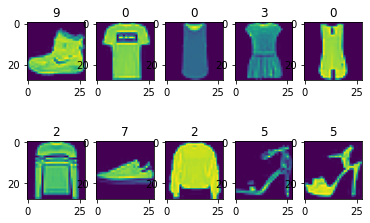

In [3]:
import matplotlib.pyplot as plt

for image in range(10):
    plt.subplot(2,5,image + 1)
    plt.imshow(train_images[image])
    plt.title(train_id[image])

#### Checking color gradation of the pictures

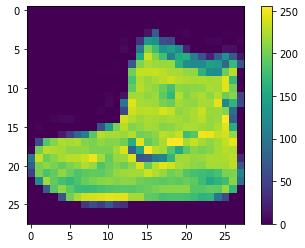

In [4]:
# get a example
plt.imshow(train_images[0])
plt.colorbar()

#### We need to normalize the color gradation from 0 to 1

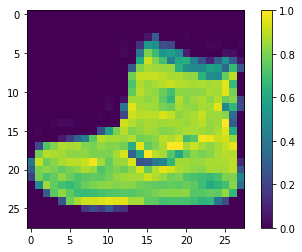

In [5]:
# just divide all pictures to 255
train_images = train_images/255.0 
test_images  = test_images/255.0 

plt.imshow(train_images[0])
plt.colorbar()

## Building the Neural Network Model

In [6]:
model = keras.Sequential([
    # input layer  - flattens the images into a one-dimensional vector
    keras.layers.Flatten(input_shape =  (28, 28)),
    # hidden layer
    keras.layers.Dense(
        units = 256, 
        activation = tensorflow.nn.relu,
        use_bias = True, 
        # try to solves the problem of explosive gradients or gradients that disappear
        # initializes model weights with median values
        kernel_initializer = 'glorot_uniform', 
        # initializes bias with zeros
        bias_initializer='zeros', 
        kernel_regularizer = None, 
        bias_regularizer = None, 
        activity_regularizer = None, 
        kernel_constraint = None, 
        bias_constraint = None
    ),
    # includind dropout
    keras.layers.Dropout(0.2),
    # exit layer - 10 existing categories
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

# get summary of model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


## Compiling the Model

In [7]:
model.compile(
    # stochastic downward gradient with moment estimate (recalculates biases)
    optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training the Model
##### Over the Epochs the loss should decrease and the acc increase

In [8]:
import time

start = time.time()
history = model.fit(
    x = train_images , 
    y = train_id , 
    epochs = 30, 
    # 20% of train dataset will be use to make validation over training
    validation_split = 0.25,
    verbose = 0
)
end = time.time()
print(f'\n[Tempo de treinamento: {round(end - start,3)} segundos]')


[Tempo de treinamento: 140.145 segundos]


## Note

#### In the training process, if the network misses a classification, the values that have been propagated must be recalculated.
#### The principle of classification with neural networks is to generate surfaces that separate data from the dataset in order to group them into parts of the same nature / classification / type.
#### What makes these curves / surfaces adjust is precisely the weights of the model, when training the model we are updating the weights, that is, changing the shape of the surfaces.
#### Biases are the distance measurements of a data from the dataset for that surface that separates the data, that is, which is far from an element of the classification surfaces

## Evaluating the Model

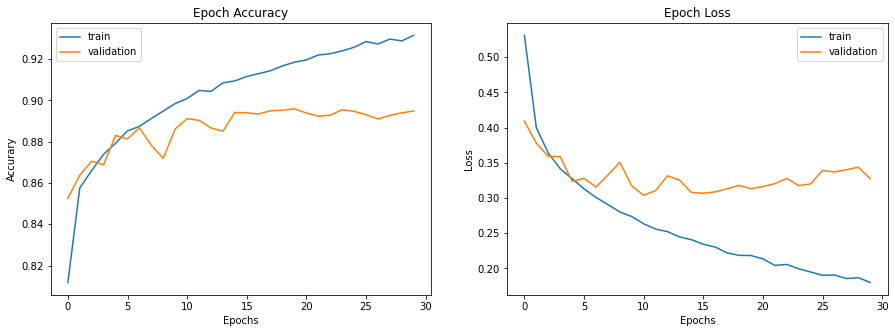

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

plt.subplot(1,2,1)
plt1 = plt.plot(history.history['accuracy'])
plt1 = plt.plot(history.history['val_accuracy'])
plt.title("Epoch Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accurary')
plt.legend(['train','validation'])

plt.subplot(1,2,2)
plt1 = plt.plot(history.history['loss'])
plt1 = plt.plot(history.history['val_loss'])
plt.title("Epoch Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'])

plt.show()

In [10]:
test_lost , test_acc = model.evaluate(test_images, test_id, verbose = 0)
print(f'[Test lost : {test_lost} Test Accuracy : {test_acc}]\n')

[Test lost : 0.36277732253074646 Test Accuracy : 0.8884999752044678]



### Evaluating the graph we can notice that model is on overfitting. This is because the model starts to hit a lot with the training data, making mistakes with the validation data
### The number of epochs that seems to be that the model behaves ideally with both training and evaluation data is between 3 and 5 epochs. 
## So we trained the model again with 4 epochs and tested again


[Tempo de treinamento: 24.58 segundos]
[Test lost : 0.37361961603164673 Test Accuracy : 0.862500011920929]



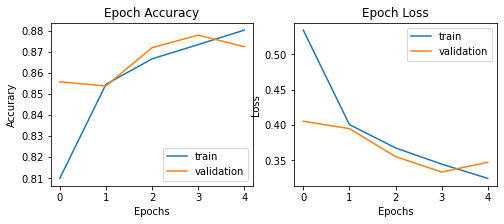

In [11]:
model = keras.Sequential([
    # input layer  - flattens the images into a one-dimensional vector
    keras.layers.Flatten(input_shape =  (28, 28)),
    # hidden layer
    keras.layers.Dense(
        units = 256, 
        activation = tensorflow.nn.relu,
        use_bias = True, 
        # try to solves the problem of explosive gradients or gradients that disappear
        # initializes model weights with median values
        kernel_initializer = 'glorot_uniform', 
        # initializes bias with zeros
        bias_initializer='zeros', 
        kernel_regularizer = None, 
        bias_regularizer = None, 
        activity_regularizer = None, 
        kernel_constraint = None, 
        bias_constraint = None
    ),
    # includind dropout
    keras.layers.Dropout(0.2),
    # exit layer - 10 existing categories
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

model.compile(
    # stochastic downward gradient with moment estimate (recalculates biases)
    optimizer = 'adam' , 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

start = time.time()
history = model.fit(
    x = train_images , 
    y = train_id , 
    epochs = 5, 
    # 20% of train dataset will be use to make validation over training
    validation_split = 0.25,
    verbose = 0
)
end = time.time()
print(f'\n[Tempo de treinamento: {round(end - start,3)} segundos]')

test_lost , test_acc = model.evaluate(test_images, test_id, verbose = 0)
print(f'[Test lost : {test_lost} Test Accuracy : {test_acc}]\n')

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
plt2 = plt.plot(history.history['accuracy'])
plt2 = plt.plot(history.history['val_accuracy'])
plt.title("Epoch Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accurary')
plt.legend(['train','validation'])

plt.subplot(1,2,2)
plt2 = plt.plot(history.history['loss'])
plt2 = plt.plot(history.history['val_loss'])
plt.title("Epoch Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'])

plt.show()

### We can change the learning rate of optimizer = is the momentum of learning ::: this means that the higher the LR, the greater the "step" of the descending gradient
#### depending on the problem, too big a "step" can make the model lose a lot of information and not ideally learn
#### depending on the problem, a very small "step" can take a lot of unnecessary information for learning, and still take a long time to train the model


[Tempo de treinamento: 24.949 segundos]
[Test lost : 2.371001720428467 Test Accuracy : 0.10000000149011612]



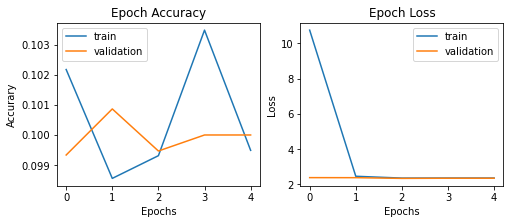

In [12]:
model = keras.Sequential([
    # input layer  - flattens the images into a one-dimensional vector
    keras.layers.Flatten(input_shape =  (28, 28)),
    # hidden layer
    keras.layers.Dense(
        units = 256, 
        activation = tensorflow.nn.relu,
        use_bias = True, 
        # try to solves the problem of explosive gradients or gradients that disappear
        # initializes model weights with median values
        kernel_initializer = 'glorot_uniform', 
        # initializes bias with zeros
        bias_initializer='zeros', 
        kernel_regularizer = None, 
        bias_regularizer = None, 
        activity_regularizer = None, 
        kernel_constraint = None, 
        bias_constraint = None
    ),
    # includind dropout
    keras.layers.Dropout(0.2),
    # exit layer - 10 existing categories
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

model.compile(
    optimizer = keras.optimizers.Adam(lr = 0.5) , 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

start = time.time()
history = model.fit(
    x = train_images , 
    y = train_id , 
    epochs = 5, 
    # 20% of train dataset will be use to make validation over training
    validation_split = 0.25,
    verbose = 0
)
end = time.time()
print(f'\n[Tempo de treinamento: {round(end - start,3)} segundos]')

test_lost , test_acc = model.evaluate(test_images, test_id, verbose = 0)
print(f'[Test lost : {test_lost} Test Accuracy : {test_acc}]\n')

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
plt3 = plt.plot(history.history['accuracy'])
plt3 = plt.plot(history.history['val_accuracy'])
plt.title("Epoch Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accurary')
plt.legend(['train','validation'])

plt.subplot(1,2,2)
plt3 = plt.plot(history.history['loss'])
plt3 = plt.plot(history.history['val_loss'])
plt.title("Epoch Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'])

plt.show()

### We can see that loss is bigger now with LR = 0.5 - we can conclude that our model lost information and failed to learn correctly

### we will now change the batch size: which determines how many elements will be used for training before updating the model weights
### This has the potential to shorten training time


[Tempo de treinamento: 9.295 segundos]
[Test lost : 0.395095556974411 Test Accuracy : 0.8597999811172485]



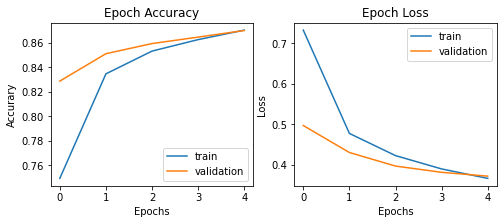

In [13]:
model = keras.Sequential([
    # input layer  - flattens the images into a one-dimensional vector
    keras.layers.Flatten(input_shape =  (28, 28)),
    # hidden layer
    keras.layers.Dense(
        units = 256, 
        activation = tensorflow.nn.relu,
        use_bias = True, 
        # try to solves the problem of explosive gradients or gradients that disappear
        # initializes model weights with median values
        kernel_initializer = 'glorot_uniform', 
        # initializes bias with zeros
        bias_initializer='zeros', 
        kernel_regularizer = None, 
        bias_regularizer = None, 
        activity_regularizer = None, 
        kernel_constraint = None, 
        bias_constraint = None
    ),
    # includind dropout
    keras.layers.Dropout(0.2),
    # exit layer - 10 existing categories
    keras.layers.Dense(10, activation = tensorflow.nn.softmax)
])

model.compile(
    # default lr
    optimizer = keras.optimizers.Adam(lr = 0.001) , 
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

start = time.time()
history = model.fit(
    x = train_images , 
    y = train_id , 
    epochs = 5, 
    # update the weigths to each 480 elements
    batch_size = 480,
    # 20% of train dataset will be use to make validation over training
    validation_split = 0.25,
    verbose = 0
)
end = time.time()
print(f'\n[Tempo de treinamento: {round(end - start,3)} segundos]')

test_lost , test_acc = model.evaluate(test_images, test_id, verbose = 0)
print(f'[Test lost : {test_lost} Test Accuracy : {test_acc}]\n')

plt.figure(figsize=(8, 3))

plt.subplot(1,2,1)
plt3 = plt.plot(history.history['accuracy'])
plt3 = plt.plot(history.history['val_accuracy'])
plt.title("Epoch Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accurary')
plt.legend(['train','validation'])

plt.subplot(1,2,2)
plt3 = plt.plot(history.history['loss'])
plt3 = plt.plot(history.history['val_loss'])
plt.title("Epoch Loss")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','validation'])

plt.show()